In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [27]:
df = pd.read_pickle('koh_movie_data_abridged.pkl')
# df = pd.read_csv('movie_data.csv', lineterminator='\n')
# df = pd.read_csv('movie_data.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
popularity              1000 non-null float64
id                      1000 non-null int64
video                   1000 non-null bool
vote_count              1000 non-null int64
vote_average            1000 non-null float64
title                   1000 non-null object
release_date            1000 non-null object
original_language       1000 non-null object
original_title          1000 non-null object
genre_ids               1000 non-null object
backdrop_path           975 non-null object
adult                   1000 non-null bool
overview                1000 non-null object
poster_path             996 non-null object
genre_mapped_ids        998 non-null object
revenue                 1000 non-null float64
runtime                 995 non-null float64
production_companies    1000 non-null object
dtypes: bool(2), float64(4), int64(2), object(10)
memory usage: 127.1+ KB


In [29]:
df.describe()

,popularity,id,vote_count,vote_average,revenue,runtime
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,995.000000
mean,15.957516,385169.575000,2149.997000,6.523800,1.541552e+08,115.493467
std,19.514051,113734.941816,3086.526926,1.182164,3.071349e+08,89.522334
min,0.600000,14564.000000,0.000000,0.000000,1.294480e+06,0.000000
25%,8.702500,304368.250000,178.000000,6.000000,1.704687e+07,99.000000
50%,13.740500,381283.500000,941.000000,6.600000,4.880070e+07,111.000000
75%,19.453750,460153.000000,2809.000000,7.200000,1.487235e+08,126.000000
max,522.654000,709579.000000,22840.000000,10.000000,4.760000e+09,2820.000000


In [30]:
# create new dataframe with unique row for each genre for each movie
df2 = pd.DataFrame(columns=df.columns)

for i in df.index:
    row = df.loc[i]
    
    if type(row['genre_mapped_ids']) is str or type(row['genre_mapped_ids']) is list:
        for genre in row['genre_mapped_ids']:
            row['genre'] = genre
            df2 = df2.append(row)
    else:
        row['genre'] = row['genre_mapped_ids']
        df2 = df2.append(row)

df2.head()


/Users/koh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/koh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/koh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gui

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,backdrop_path,adult,overview,poster_path,genre_mapped_ids,revenue,runtime,production_companies,genre
0,39.589,299534,False,13321,8.3,Avengers: Endgame,2019-04-24,en,Avengers: Endgame,"[12, 878, 28]",/orjiB3oUIsyz60hoEqkiGpy5CeO.jpg,False,After the devastating events of Avengers: Infi...,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,"[Adventure, Science Fiction, Action]",2.797801e+09,181.0,"{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZx...",Adventure
0,39.589,299534,False,13321,8.3,Avengers: Endgame,2019-04-24,en,Avengers: Endgame,"[12, 878, 28]",/orjiB3oUIsyz60hoEqkiGpy5CeO.jpg,False,After the devastating events of Avengers: Infi...,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,"[Adventure, Science Fiction, Action]",2.797801e+09,181.0,"{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZx...",Science Fiction
0,39.589,299534,False,13321,8.3,Avengers: Endgame,2019-04-24,en,Avengers: Endgame,"[12, 878, 28]",/orjiB3oUIsyz60hoEqkiGpy5CeO.jpg,False,After the devastating events of Avengers: Infi...,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,"[Adventure, Science Fiction, Action]",2.797801e+09,181.0,"{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZx...",Action
1,77.767,420818,False,5874,7.2,The Lion King,2019-07-12,en,The Lion King,"[12, 10751]",/nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg,False,"Simba idolizes his father, King Mufasa, and ta...",/2bXbqYdUdNVa8VIWXVfclP2ICtT.jpg,"[Adventure, Family]",1.656943e+09,118.0,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",Adventure
1,77.767,420818,False,5874,7.2,The Lion King,2019-07-12,en,The Lion King,"[12, 10751]",/nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg,False,"Simba idolizes his father, King Mufasa, and ta...",/2bXbqYdUdNVa8VIWXVfclP2ICtT.jpg,"[Adventure, Family]",1.656943e+09,118.0,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",Family


In [31]:
df2.corr()

,popularity,vote_average,revenue,runtime
popularity,1.000000,0.157934,0.279536,-0.017575
vote_average,0.157934,1.000000,-0.022499,-0.196254
revenue,0.279536,-0.022499,1.000000,0.571163
runtime,-0.017575,-0.196254,0.571163,1.000000


In [32]:
df2_mean = df2.groupby('genre').mean().sort_values(by='revenue', ascending=False)
df2_mean

,popularity,vote_average,revenue,runtime
genre,,,,
Western,15.032143,5.885714,8.151253e+08,518.000000
Adventure,20.461399,6.510550,3.825588e+08,124.646789
Science Fiction,28.292542,6.461017,3.663434e+08,117.254237
Family,17.390172,6.574138,2.840675e+08,101.534483
Fantasy,18.885087,6.518254,2.742937e+08,109.428571
Action,17.498752,6.399032,2.631785e+08,129.380645
Animation,14.695453,6.591509,2.323111e+08,91.264151
Comedy,14.114255,6.417175,1.354419e+08,104.480447
Crime,14.973094,6.389063,1.285783e+08,138.968750


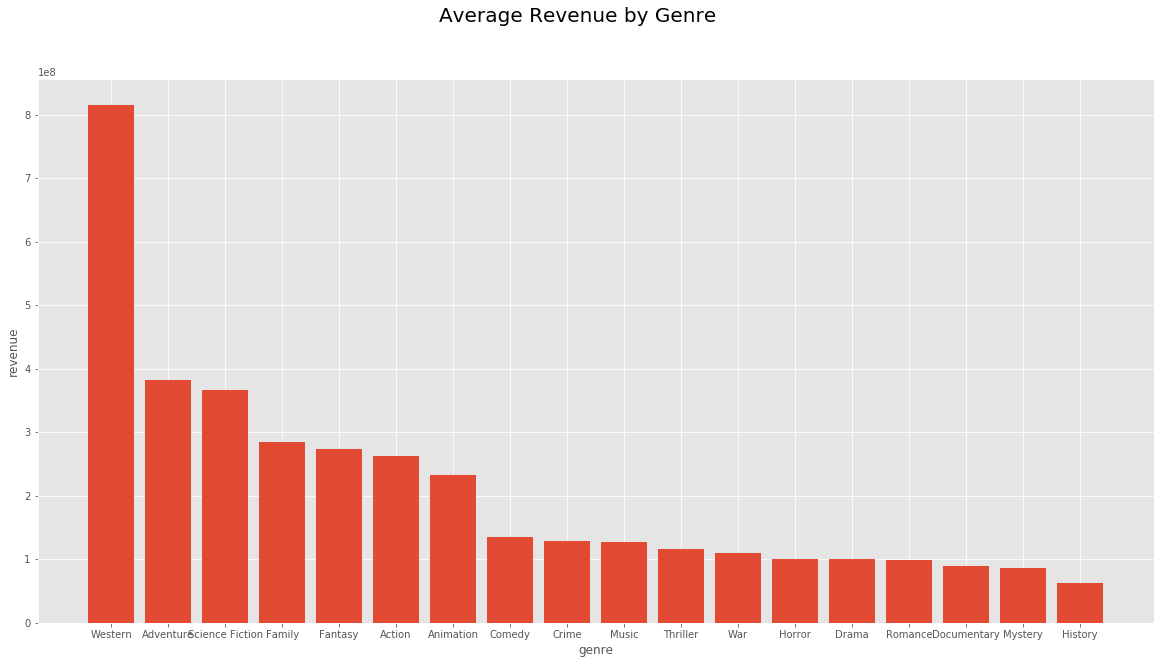

In [33]:
f, ax = plt.subplots(figsize=(20,10))
f.suptitle('Average Revenue by Genre', fontsize=20)
plt.bar(df2_mean.index, df2_mean.revenue)
ax.set_ylabel('revenue')
ax.set_xlabel('genre');

In [34]:
# create new dataframe with unique row for each production company for each movie
df3 = pd.DataFrame(columns=df.columns)

for i in df.index:
    row = df.loc[i]
    production_companies = row['production_companies']
    
    if type(production_companies) is dict:
        row['production'] = production_companies['name']
        df3 = df3.append(row)
    elif type(production_companies) is list:
        for prod in row['production_companies']:
            row['production'] = prod['name']
            df3 = df3.append(row)


/Users/koh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/koh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [35]:
df3.head()

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,backdrop_path,adult,overview,poster_path,genre_mapped_ids,revenue,runtime,production_companies,production
0,39.589,299534,False,13321,8.3,Avengers: Endgame,2019-04-24,en,Avengers: Endgame,"[12, 878, 28]",/orjiB3oUIsyz60hoEqkiGpy5CeO.jpg,False,After the devastating events of Avengers: Infi...,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,"[Adventure, Science Fiction, Action]",2.797801e+09,181.0,"{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZx...",Marvel Studios
1,77.767,420818,False,5874,7.2,The Lion King,2019-07-12,en,The Lion King,"[12, 10751]",/nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg,False,"Simba idolizes his father, King Mufasa, and ta...",/2bXbqYdUdNVa8VIWXVfclP2ICtT.jpg,"[Adventure, Family]",1.656943e+09,118.0,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",Walt Disney Pictures
1,77.767,420818,False,5874,7.2,The Lion King,2019-07-12,en,The Lion King,"[12, 10751]",/nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg,False,"Simba idolizes his father, King Mufasa, and ta...",/2bXbqYdUdNVa8VIWXVfclP2ICtT.jpg,"[Adventure, Family]",1.656943e+09,118.0,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",Fairview Entertainment
2,74.587,330457,False,4637,7.2,Frozen II,2019-11-20,en,Frozen II,"[12, 16, 10751]",/xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg,False,"Elsa, Anna, Kristoff and Olaf head far into th...",/pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg,"[Adventure, Animation, Family]",1.330765e+09,104.0,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...",Walt Disney Animation Studios
2,74.587,330457,False,4637,7.2,Frozen II,2019-11-20,en,Frozen II,"[12, 16, 10751]",/xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg,False,"Elsa, Anna, Kristoff and Olaf head far into th...",/pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg,"[Adventure, Animation, Family]",1.330765e+09,104.0,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...",Walt Disney Pictures


In [36]:
# get top 15 production companies by average revenue
df3_mean = df3.groupby('production').mean().sort_values(by='revenue', ascending=False)[:15]
df3_mean

,popularity,vote_average,revenue,runtime
production,,,,
Rockstar Games,0.660000,0.000000,4.760000e+09,2820.000000
Truenorth Productions,43.278000,7.400000,2.068224e+09,136.000000
"Colorado Office of Film, Television & Media",24.477000,7.300000,1.515048e+09,137.000000
Abu Dhabi Film Commission,24.477000,7.300000,1.515048e+09,137.000000
Fairview Entertainment,50.811500,7.000000,1.311747e+09,112.000000
Fuji Eight Company Ltd.,24.685000,6.900000,1.238765e+09,136.000000
Marvel Studios,41.654462,7.492308,1.186713e+09,135.153846
Rodeo FX,25.726000,6.800000,1.143689e+09,144.000000
Panoramic Pictures,25.726000,6.800000,1.143689e+09,144.000000


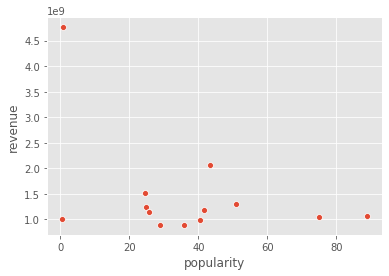

In [37]:
ax = sns.scatterplot(x="popularity", y="revenue", data=df3_mean)

Text(0.5, 1.0, 'Average Revenue Time Series by Studio')

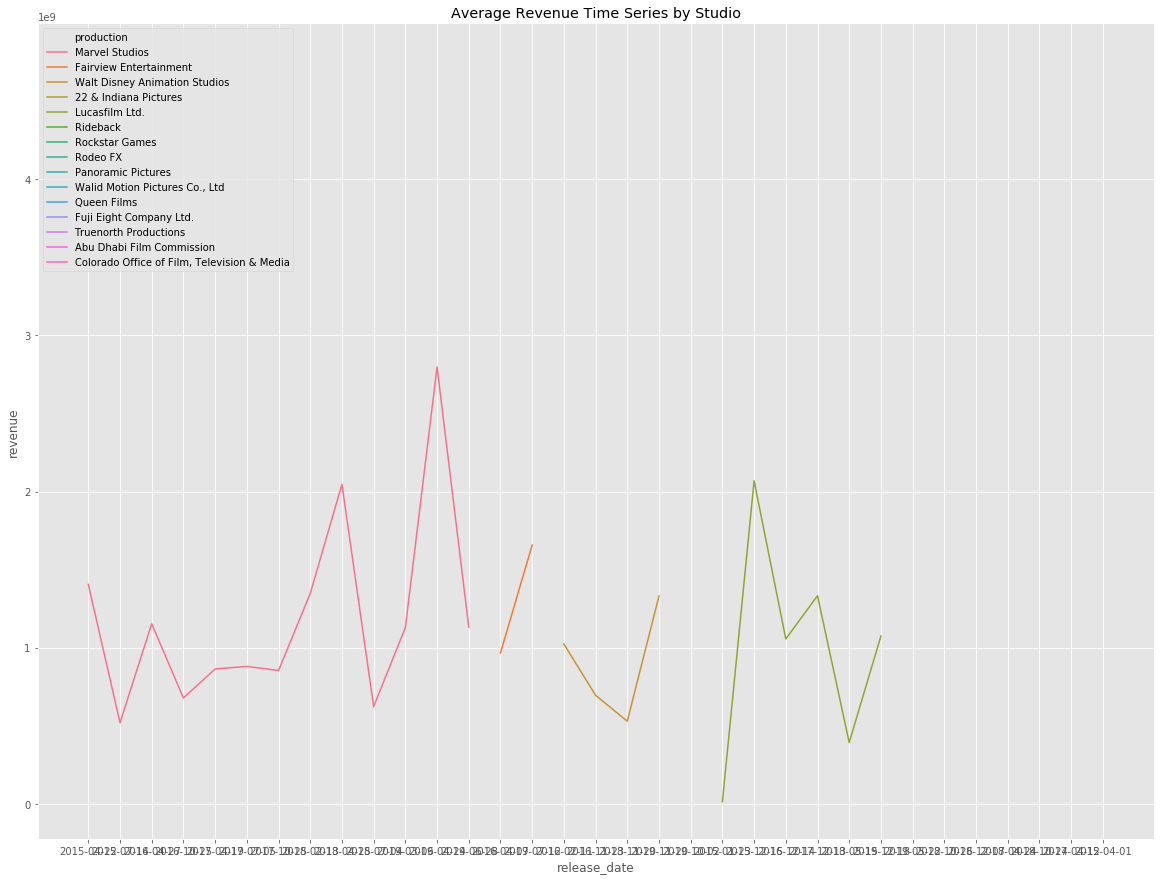

In [39]:
time_series = df3.loc[df3.production.isin(df3_mean.index)]
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
line_plot = sns.lineplot(x='release_date', y='revenue', hue='production', ax=ax, data=time_series)
line_plot.set_title('Average Revenue Time Series by Studio')